# Q1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


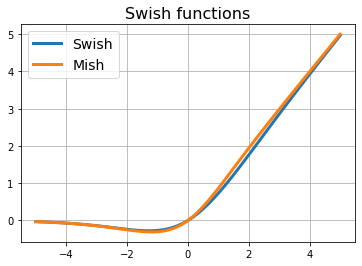

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

#swish
def swish(x: int):
  return x/(1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
 
def softplus(x):
    return np.log(1 + np.exp(x))
 
def mish(x):
    return x * tanh(softplus(x))

x = np.linspace(-5, 5, 100)


swish_x = swish(x)
mish_x = mish(x)

plt.title("Swish functions", fontsize = 16)
plt.plot(x, swish_x, label= 'Swish', linewidth = 3)
plt.plot(x, mish_x, label= 'Mish', linewidth = 3)
plt.legend(prop={'size': 14})
plt.grid()
plt.axes()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


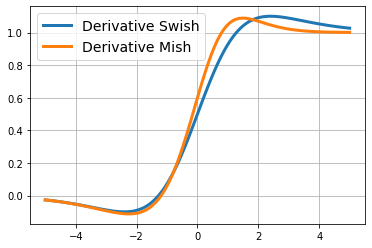

In [47]:


def sig(x):
  return 1 / (1 + np.exp(-x))

def swish_derivative(x):
  return swish(x) + sig(x) * (1 - swish(x))

def mish_derivative(x):
    gama = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
    delta = 1 + pow((np.exp(x) + 1), 2)
    derivative = np.exp(x) * gama / pow(delta, 2)
    return derivative


d_s = swish_derivative(x)
m_s = mish_derivative(x)

plt.plot(x, d_s, label= 'Derivative Swish', linewidth = 3)
plt.plot(x, m_s, label= 'Derivative Mish', linewidth = 3)
plt.legend(prop={'size': 14})
plt.grid()
plt.axes()
plt.show()

# Q3

In [48]:
%matplotlib inline
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.utils import shuffle

In [49]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [50]:
#double size of trains

x_train_v2 = 255 - x_train

x_test_v2 = 255 - x_test


x_train = np.concatenate( (x_train, x_train_v2) )
y_train = np.concatenate( (y_train, y_train) )

x_test = np.concatenate( (x_test, x_test_v2) )
y_test = np.concatenate( (y_test, y_test) )


In [51]:
#https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html
#shuffle togheter
x_train, y_train = shuffle(x_train, y_train, random_state=0)

x_test, y_test = shuffle(x_test, y_test, random_state=0)

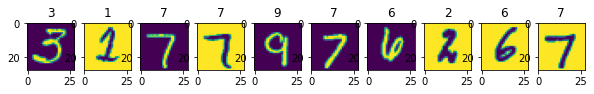

In [52]:
fig, ax = plt.subplots(1, 10, figsize=(10, 8))
for i in range(10):
  ax[i].set_title(y_train[i])
  ax[i].imshow(x_train[i])

plt.show()

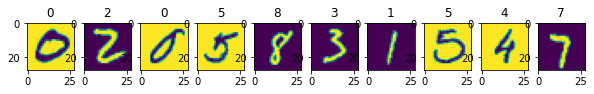

In [53]:
fig, ax = plt.subplots(1, 10, figsize=(10, 8))

for i in range(10):
  ax[i].set_title(y_test[i])
  ax[i].imshow(x_test[i])
plt.show()

In [54]:

#we should reshape to use conv layers
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = x_train.astype('float')

#scale
# print(x_train)
x_train /= 255.0
print(x_train.shape)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
#scale
x_test = x_test.astype('float')
x_test /= 255.0
print(x_test.shape)

y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test.shape)

(120000, 28, 28, 1)
(20000, 28, 28, 1)
(120000, 10)
(20000, 10)


In [55]:

def plot_helper(history):
  with plt.style.context('ggplot'): #ggplot is good for visualization
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].legend()

    ax[1].plot(history.history['val_accuracy'], label='val_acc')
    ax[1].plot(history.history['accuracy'], label='acc')
    ax[1].legend()

In [56]:
from tensorflow import keras
from tensorflow.keras import layers

#https://stackoverflow.com/questions/42112260/how-do-i-use-the-tensorboard-callback-of-keras
#https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
def build_and_test_model(input_shape, actnvation_func1, actnvation_func2):
  model = keras.Sequential(
    [ 
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(7, 7)),
        actnvation_func1,
     
        layers.Conv2D(8, kernel_size=(5, 5)),
        actnvation_func2,

        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
  )

  model.summary()

  batch_size = 128
  epochs = 5

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  # tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

  plot_helper(history)

  score = model.evaluate(x_test, y_test, verbose=0)
  print("Test loss:", score[0])
  print("Test accuracy:", score[1])

  return model


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 18, 18, 8)         1608      
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 18, 18, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

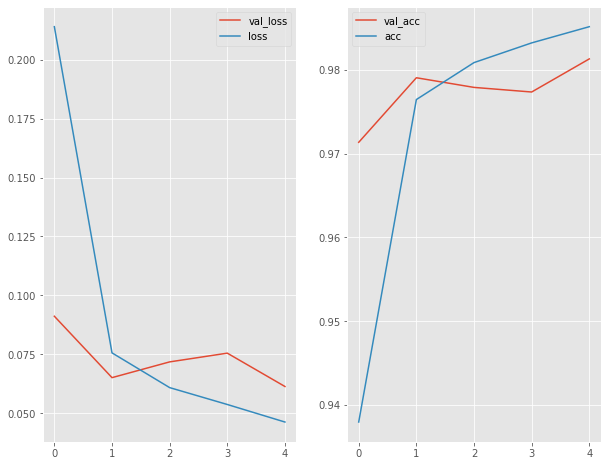

In [57]:

#alpha -1
# print((x_train.shape[1], x_train.shape[2], x_train.shape[3]))
build_and_test_model((x_train.shape[1], x_train.shape[2], x_train.shape[3]), layers.LeakyReLU(alpha=-1), layers.LeakyReLU(alpha=-1))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 18, 18, 8)         1608      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 18, 18, 8)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

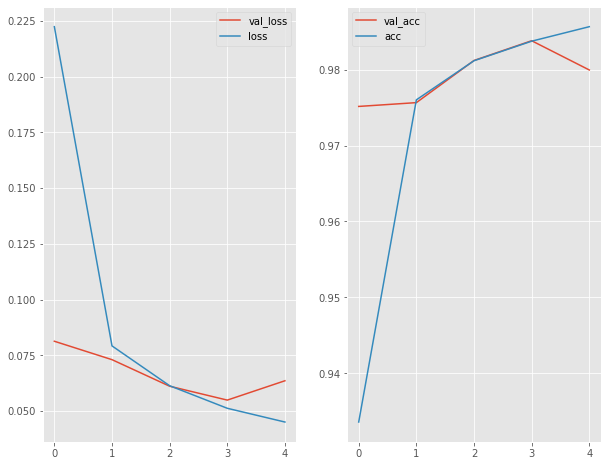

In [58]:
#alpha -0.5
build_and_test_model((x_train.shape[1], x_train.shape[2], x_train.shape[3]), layers.LeakyReLU(alpha=-0.5), layers.LeakyReLU(alpha=-0.5))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 18, 18, 8)         1608      
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 18, 18, 8)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

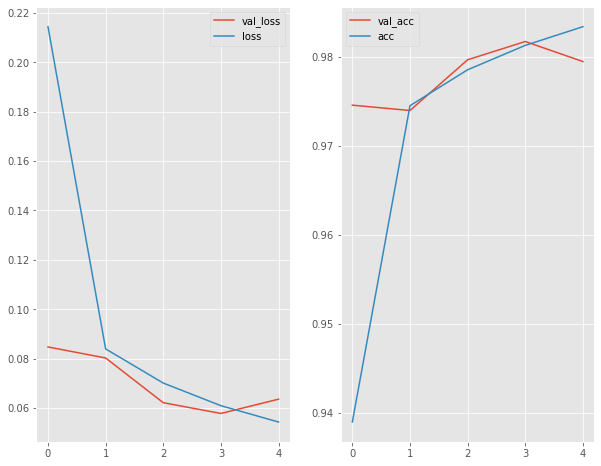

In [59]:
#alpha 0
build_and_test_model((x_train.shape[1], x_train.shape[2], x_train.shape[3]), layers.LeakyReLU(alpha=0), layers.LeakyReLU(alpha=0))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 18, 18, 8)         1608      
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 18, 18, 8)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

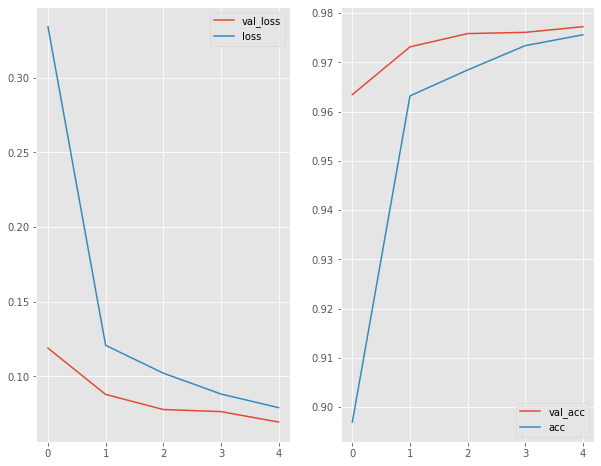

In [60]:
#alpha 0.5
build_and_test_model((x_train.shape[1], x_train.shape[2], x_train.shape[3]), layers.LeakyReLU(alpha=0.5), layers.LeakyReLU(alpha=0.5))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 18, 18, 8)         1608      
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 18, 18, 8)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

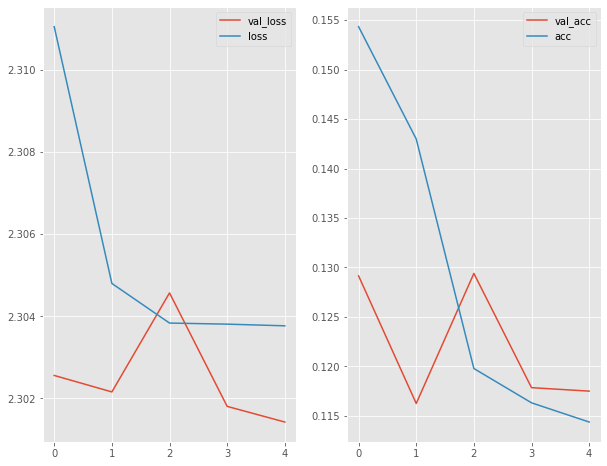

In [61]:
#alpha 1
build_and_test_model((x_train.shape[1], x_train.shape[2], x_train.shape[3]), layers.LeakyReLU(alpha=1), layers.LeakyReLU(alpha=1))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 22, 22, 8)         400       
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 22, 22, 8)         8         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 18, 18, 8)         1608      
_________________________________________________________________
p_re_lu_9 (PReLU)            (None, 18, 18, 8)         8         
_________________________________________________________________
flatten_15 (Flatten)         (None, 2592)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                25930     
Total params: 27,954
Trainable params: 27,954
Non-trainable params: 0
_________________________________________________

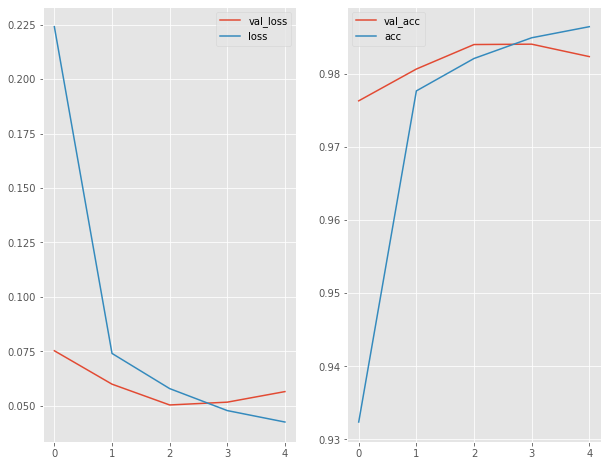

In [62]:

model = build_and_test_model((x_train.shape[1], x_train.shape[2], x_train.shape[3]), layers.PReLU(shared_axes=[1, 2]), layers.PReLU(shared_axes=[1, 2]))


In [67]:

print(len(model.get_weights()))
print(model.get_weights()[0].shape)
print(model.get_weights()[1].shape)
print(model.get_weights()[2].shape)
print(model.get_weights()[3].shape)
print(model.get_weights()[4].shape)
print(model.get_weights()[5].shape)
print(model.get_weights()[6].shape)
print(model.get_weights()[7].shape)

# print("alpha of first layer is " + str(model.layers[0].get_weights()[1]))
print("alpha of first layer is " + str(model.get_weights()[2]))
print("alpha of second layer is " + str(model.get_weights()[5]))

8
(7, 7, 1, 8)
(8,)
(1, 1, 8)
(5, 5, 8, 8)
(8,)
(1, 1, 8)
(2592, 10)
(10,)
alpha of first layer is [[[-0.13062368 -0.32981426 -0.15449685 -0.01115255  0.25218496
   -0.16997162 -0.13641433 -0.2142687 ]]]
alpha of second layer is [[[ 0.10166846  0.00375379  0.1493998   0.20635578 -0.38268992
   -0.303716   -0.13066185 -0.17081705]]]
